# Contents


1. All lines PTL Trend Chart
2. Acf analysis
3. Relationship between covid cases and ptl investigated

In [1]:


pip install ydata-profiling

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
from ydata_profiling import ProfileReport

In [3]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [4]:
df=pd.read_csv('alllines_ptl_complete.csv', parse_dates=[0], index_col=0, date_parser=parser)

In [5]:
ProfileReport(df).to_file(output_file='Report1')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\arjun\AppData\Roaming\Python\Python39\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df

,line,total,MDU (Business Days Mean),MSD (Saturdays Mean),MDO (Sundays Mean),MAX (Daily Max)
year_month,,,,,,
2018-08-01,3,38679000.0,1440000.0,884000.0,504000.0,1483000.0
2018-08-01,1,37775000.0,1420000.0,832000.0,446000.0,1466000.0
2018-08-01,15,516000.0,22000.0,NaN,2000.0,23000.0
2018-08-01,2,18164000.0,701000.0,318000.0,194000.0,723000.0
2018-08-01,5,7220000.0,309000.0,176000.0,85000.0,322000.0
...,...,...,...,...,...,...
2023-04-01,2,14544000.0,649000.0,299000.0,189000.0,671000.0
2023-04-01,4,15070570.0,661450.0,338300.0,201580.0,701710.0
2023-04-01,5,11792220.0,510810.0,282420.0,160710.0,527250.0


Mainly Analysing MDU (Business Days Mean) as MDU and MAX(Daily Max) are the most important parameters

In [7]:
#Splitting the data for different lines
l1=df[df['line']==1]
l2=df[df['line']==2]
l15=df[df['line']==15]
l3=df[df['line']==3]
l4=df[df['line']==4]
l5=df[df['line']==5]

In [8]:
#Setting the frequency as the most likely frequency by using pd.infer_freq
l1 = l1.asfreq(pd.infer_freq(l1.index))
l2 = l2.asfreq(pd.infer_freq(l2.index))
l3 = l3.asfreq(pd.infer_freq(l3.index))
l15 = l15.asfreq(pd.infer_freq(l15.index))
l4 = l4.asfreq(pd.infer_freq(l4.index))
l5 = l5.asfreq(pd.infer_freq(l5.index))

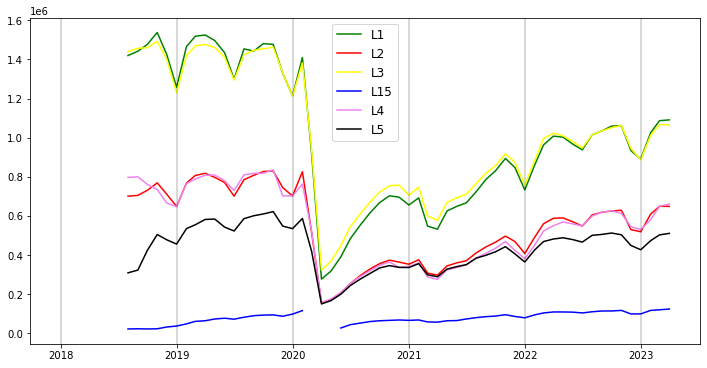

In [9]:
#Plotting the PLT plot for all the lines
plt.figure(figsize=(12,6))
L1, = plt.plot(l1['MDU (Business Days Mean)'],color='green')
L2, = plt.plot(l2['MDU (Business Days Mean)'], color='red')
L3, = plt.plot(l3['MDU (Business Days Mean)'], color='yellow')
L15, = plt.plot(l15['MDU (Business Days Mean)'], color='blue')
L4, = plt.plot(l4['MDU (Business Days Mean)'], color='violet')
L5, = plt.plot(l5['MDU (Business Days Mean)'], color='black')
for year in range(2018, 2024):
    plt.axvline(datetime(year,1,1),  color='k', alpha=0.2)

plt.legend(['L1', 'L2','L3','L15','L4','L5'], fontsize=12)
plt.show()

<center><h2> Major observations </h2></center>
<br><br>
<ul>
    <li>
        All lines are closely corelated except L15. Also L15 has quite less passengers that other lines. I think a probable explanation can be that it is a the latest line built with only 10 out of 18 stations operational right now and is currently under expansion project. Another peculiar detail is that it is the only line under study which is monorail although I am not sure whether that can be a reason or not.
    </li>    
    <li>Before COVID, the data shows semi annual seasonality (especially apparent in the MDU chart) with substantial dip in the middle months of the year (June - July) . A probable reason for that can be vacation periods, and cold weather conditions.
Such seasonality is not observed during 2020-2021 and 2021-2022 . It is because this was the recovery period against COVID and hence a sort of linear trend is observed with lack of substantial seasonality.
    </li>
    <li>
    In 2022-2023, trend can be seen to be getting saturated year by year. Also the semi annual seasonality is appearing to be getting restored with similar "humps" appearing as pre Covid.
    </li>
    -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


#### Analysing Pre Covid Data

Using Line 1 as it is a good representative of all lines (except line 15)

In [10]:
start_date = datetime(2018,2,1)
end_date = datetime(2019,8,1)

trimmed_l1 = l1[start_date:end_date]
trimmed_l1

,line,total,MDU (Business Days Mean),MSD (Saturdays Mean),MDO (Sundays Mean),MAX (Daily Max)
year_month,,,,,,
2018-08-01,1,37775000.0,1420000.0,832000.0,446000.0,1466000.0
2018-09-01,1,34371000.0,1442000.0,822000.0,465000.0,1521000.0
2018-10-01,1,38308000.0,1477000.0,836000.0,482000.0,1524000.0
2018-11-01,1,35499000.0,1538000.0,843000.0,499000.0,1611000.0
2018-12-01,1,34213000.0,1425000.0,890000.0,543000.0,1585000.0
2019-01-01,1,32037000.0,1258000.0,721000.0,454000.0,1362000.0
2019-02-01,1,34705000.0,1466000.0,851000.0,495000.0,1544000.0
2019-03-01,1,36580000.0,1519000.0,855000.0,493000.0,1550000.0
2019-04-01,1,37571000.0,1525000.0,816000.0,459000.0,1558000.0


In [11]:
#Analysing first difference of the line 2
first_diff = trimmed_l1.diff()[1:]

Text(0.5, 1.0, 'First Difference of Line 2')

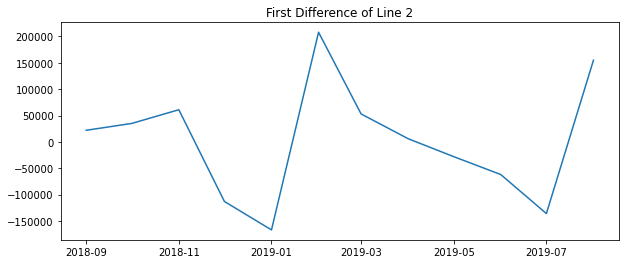

In [12]:
plt.figure(figsize=(10,4))
plt.plot(first_diff['MDU (Business Days Mean)'])
plt.title('First Difference of Line 2')


In [13]:

first_diff=first_diff['MDU (Business Days Mean)']
first_diff

year_month
2018-09-01     22000.0
2018-10-01     35000.0
2018-11-01     61000.0
2018-12-01   -113000.0
2019-01-01   -167000.0
2019-02-01    208000.0
2019-03-01     53000.0
2019-04-01      6000.0
2019-05-01    -28000.0
2019-06-01    -62000.0
2019-07-01   -136000.0
2019-08-01    155000.0
Freq: MS, Name: MDU (Business Days Mean), dtype: float64

<BarContainer object of 8 artists>

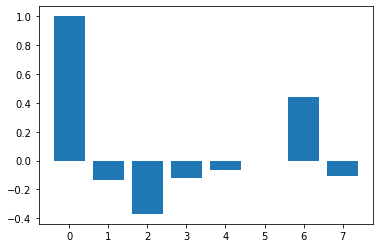

In [14]:
acf_vals = acf(first_diff)
plt.bar(range(8), acf_vals[:8])

Clearly this shows high correlation for the 6th month confirming the suspected semiannual trends

# Finding relationship between COVID data and PTL

In [15]:
df

,line,total,MDU (Business Days Mean),MSD (Saturdays Mean),MDO (Sundays Mean),MAX (Daily Max)
year_month,,,,,,
2018-08-01,3,38679000.0,1440000.0,884000.0,504000.0,1483000.0
2018-08-01,1,37775000.0,1420000.0,832000.0,446000.0,1466000.0
2018-08-01,15,516000.0,22000.0,NaN,2000.0,23000.0
2018-08-01,2,18164000.0,701000.0,318000.0,194000.0,723000.0
2018-08-01,5,7220000.0,309000.0,176000.0,85000.0,322000.0
...,...,...,...,...,...,...
2023-04-01,2,14544000.0,649000.0,299000.0,189000.0,671000.0
2023-04-01,4,15070570.0,661450.0,338300.0,201580.0,701710.0
2023-04-01,5,11792220.0,510810.0,282420.0,160710.0,527250.0


In [16]:
l2

,line,total,MDU (Business Days Mean),MSD (Saturdays Mean),MDO (Sundays Mean),MAX (Daily Max)
year_month,,,,,,
2018-08-01,2,18164000.0,701000.0,318000.0,194000.0,723000.0
2018-09-01,2,16246000.0,705000.0,321000.0,202000.0,733000.0
2018-10-01,2,18431000.0,731000.0,326000.0,204000.0,771000.0
2018-11-01,2,16888000.0,769000.0,326000.0,216000.0,804000.0
2018-12-01,2,16283000.0,711000.0,342000.0,237000.0,786000.0
2019-01-01,2,15982000.0,648000.0,292000.0,203000.0,724000.0
2019-02-01,2,17728000.0,768000.0,360000.0,230000.0,808000.0
2019-03-01,2,18610000.0,807000.0,363000.0,230000.0,838000.0
2019-04-01,2,19637000.0,818000.0,347000.0,216000.0,832000.0


In [17]:
ex=pd.read_csv('covid_cases_and_deaths_in_sao_paulo_city.csv',parse_dates=[0], index_col=0, date_parser=parser)

In [18]:
ex

,week,accumulated_cases,new_cases,accumulated_deaths,new_deaths
date,,,,,
2020-03-27,13,0,0,0,0
2020-03-28,13,1149,1149,76,76
2020-03-29,14,1183,34,89,13
2020-03-30,14,1233,50,103,14
2020-03-31,14,1885,652,121,18
...,...,...,...,...,...
2023-06-05,23,1179207,0,44956,1
2023-06-06,23,1179207,0,44956,1
2023-06-07,23,1179207,0,44956,1


In [19]:
ex=ex.iloc[1:]

In [20]:
start_date = datetime(2020,4,1)
end_date = datetime(2023,4,1)

In [21]:
l2_ = l2[start_date:end_date]
l2_

,line,total,MDU (Business Days Mean),MSD (Saturdays Mean),MDO (Sundays Mean),MAX (Daily Max)
year_month,,,,,,
2020-04-01,2,3726000.0,155000.0,78000.0,49000.0,168000.0
2020-05-01,2,4000000.0,171000.0,86000.0,53000.0,178000.0
2020-06-01,2,5210000.0,206000.0,106000.0,61000.0,233000.0
2020-07-01,2,6651000.0,254000.0,137000.0,73000.0,281000.0
2020-08-01,2,7393000.0,295000.0,158000.0,83000.0,314000.0
2020-09-01,2,8150000.0,329000.0,181000.0,97000.0,344000.0
2020-10-01,2,9020000.0,356000.0,196000.0,107000.0,371000.0
2020-11-01,2,9080000.0,374000.0,217000.0,124000.0,387000.0
2020-12-01,2,8889000.0,364000.0,197000.0,114000.0,394000.0


In [22]:
l2_.shape

(37, 6)

In [23]:
ex_ = ex[start_date:end_date]
ex_

,week,accumulated_cases,new_cases,accumulated_deaths,new_deaths
date,,,,,
2020-04-01,14,2418,533,144,23
2020-04-02,14,2815,397,164,20
2020-04-03,14,3202,387,186,22
2020-04-04,14,3496,294,212,26
2020-04-05,15,3612,116,220,8
...,...,...,...,...,...
2023-03-28,13,1157359,0,44690,1
2023-03-29,13,1157359,0,44690,1
2023-03-30,13,1157359,0,44690,1


In [24]:
ex_=ex_.drop(columns=['week'])

In [25]:
result = pd.concat([l2_, ex_], axis=1, join='inner')
result=result.drop(columns=['line'])
result

,total,MDU (Business Days Mean),MSD (Saturdays Mean),MDO (Sundays Mean),MAX (Daily Max),accumulated_cases,new_cases,accumulated_deaths,new_deaths
2020-04-01,3726000.0,155000.0,78000.0,49000.0,168000.0,2418,533,144,23
2020-05-01,4000000.0,171000.0,86000.0,53000.0,178000.0,19087,938,1607,85
2020-06-01,5210000.0,206000.0,106000.0,61000.0,233000.0,61126,995,4304,24
2020-07-01,6651000.0,254000.0,137000.0,73000.0,281000.0,129328,2209,7258,96
2020-08-01,7393000.0,295000.0,158000.0,83000.0,314000.0,199674,2114,9619,701
2020-09-01,8150000.0,329000.0,181000.0,97000.0,344000.0,260991,3042,11478,701
2020-10-01,9020000.0,356000.0,196000.0,107000.0,371000.0,293210,1143,12797,671
2020-11-01,9080000.0,374000.0,217000.0,124000.0,387000.0,317215,245,13600,31
2020-12-01,8889000.0,364000.0,197000.0,114000.0,394000.0,352144,2232,14470,691
2021-01-01,8244000.0,353000.0,166000.0,102000.0,373000.0,402835,1117,15695,161


In [26]:
result.shape

(37, 9)

In [27]:
result

,total,MDU (Business Days Mean),MSD (Saturdays Mean),MDO (Sundays Mean),MAX (Daily Max),accumulated_cases,new_cases,accumulated_deaths,new_deaths
2020-04-01,3726000.0,155000.0,78000.0,49000.0,168000.0,2418,533,144,23
2020-05-01,4000000.0,171000.0,86000.0,53000.0,178000.0,19087,938,1607,85
2020-06-01,5210000.0,206000.0,106000.0,61000.0,233000.0,61126,995,4304,24
2020-07-01,6651000.0,254000.0,137000.0,73000.0,281000.0,129328,2209,7258,96
2020-08-01,7393000.0,295000.0,158000.0,83000.0,314000.0,199674,2114,9619,701
2020-09-01,8150000.0,329000.0,181000.0,97000.0,344000.0,260991,3042,11478,701
2020-10-01,9020000.0,356000.0,196000.0,107000.0,371000.0,293210,1143,12797,671
2020-11-01,9080000.0,374000.0,217000.0,124000.0,387000.0,317215,245,13600,31
2020-12-01,8889000.0,364000.0,197000.0,114000.0,394000.0,352144,2232,14470,691
2021-01-01,8244000.0,353000.0,166000.0,102000.0,373000.0,402835,1117,15695,161


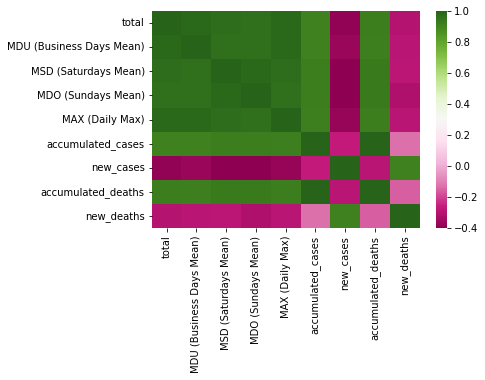

In [28]:
sns.heatmap(result.corr(),cmap='PiYG')
plt.show()

In [29]:
result.corr()

,total,MDU (Business Days Mean),MSD (Saturdays Mean),MDO (Sundays Mean),MAX (Daily Max),accumulated_cases,new_cases,accumulated_deaths,new_deaths
total,1.000000,0.987641,0.971347,0.962404,0.981967,0.910139,-0.390848,0.918002,-0.299153
MDU (Business Days Mean),0.987641,1.000000,0.965474,0.964357,0.988216,0.908224,-0.374731,0.913461,-0.288314
MSD (Saturdays Mean),0.971347,0.965474,1.000000,0.986152,0.968534,0.919970,-0.402549,0.930772,-0.286983
MDO (Sundays Mean),0.962404,0.964357,0.986152,1.000000,0.966381,0.919555,-0.402781,0.929675,-0.320088
MAX (Daily Max),0.981967,0.988216,0.968534,0.966381,1.000000,0.917363,-0.379935,0.920618,-0.292696
accumulated_cases,0.910139,0.908224,0.919970,0.919555,0.917363,1.000000,-0.265809,0.998151,-0.130697
new_cases,-0.390848,-0.374731,-0.402549,-0.402781,-0.379935,-0.265809,1.000000,-0.288575,0.909571
accumulated_deaths,0.918002,0.913461,0.930772,0.929675,0.920618,0.998151,-0.288575,1.000000,-0.157276
new_deaths,-0.299153,-0.288314,-0.286983,-0.320088,-0.292696,-0.130697,0.909571,-0.157276,1.000000
